In [1]:
import pandas as pd

In [1]:
#%matplotlib inline
# Dependencies and Setup
    # Imported Python libraries such as matplotlib, pandas and numpy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
    #loaded the two data files city_data and ride_data and renamed then as variables city_data_to_load and ride_data_to_load
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read Files and store into Pandas data frame. # Create DataFrames
    # used pd.read to read give out DataFrame (or TextParser) for the variables city_data_to_load and ride_data_to_load 
city_pd = pd.read_csv(city_data_to_load)
ride_pd = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
    #used the pd.merge merge DataFrame city_pd and ride_pd based on the common list city 
    #ALso, used how left based on result table needed and also specified how as left
    #Used head() to get the five rows
merge_table = pd.merge(ride_pd,city_pd,how="left",on=["city","city"])

# Display the data table for preview
merge_table.head(5)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

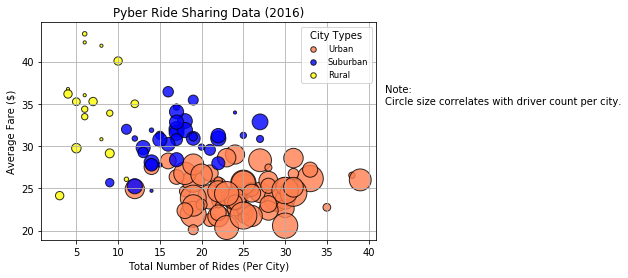

In [2]:
# Obtain the x and y coordinates for each of the three city types
    #created variables for the three city types (urban_cities, suburban_cities,rural_cities)
    # Then merged 
urban_cities = merge_table[merge_table["type"] == "Urban"]
suburban_cities = merge_table[merge_table["type"] == "Suburban"]
rural_cities = merge_table[merge_table["type"] == "Rural"]

urban_ride_count = urban_cities.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities.groupby(["city"]).count()["ride_id"]

urban_avg_fare = urban_cities.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities.groupby(["city"]).mean()["fare"]

urban_driver_count = urban_cities.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities.groupby(["city"]).mean()["driver_count"]

# Build the scatter plots for each city types
plt.scatter(urban_ride_count,urban_avg_fare,s=10*urban_driver_count, c="coral",
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Urban")
plt.scatter(suburban_ride_count,suburban_avg_fare,s=10*suburban_driver_count, c="blue",
           edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Suburban")
plt.scatter(rural_ride_count,rural_avg_fare,s=10*rural_driver_count, c="yellow",
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Rural")
# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded",
                 numpoints=1, scatterpoints=1,
                 loc="best", title="City Types",
                 labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
# Incorporate a text label regarding circle size

# Save Figure
plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig("Fig1.png")
# Show plot
plt.show()

## Total Fares by City Type

In [3]:
# Import our dependencies
import matplotlib.pyplot as plt
import numpy as np

<function matplotlib.pyplot.show(*args, **kw)>

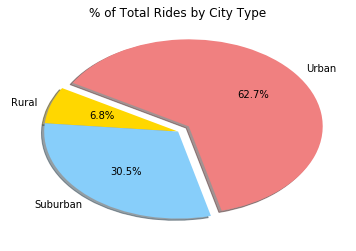

In [4]:
city_type_percent = 100 * merge_table.groupby(["type"]).sum()["fare"] / merge_table["fare"].sum()
# Build Pie Chart
plt.pie(city_type_percent,labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0, 0, 0.1],
       autopct='%1.1f%%',
       shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("Fig2.png")
# Show plot
plt.show

## Total Rides by City Type

<function matplotlib.pyplot.show(*args, **kw)>

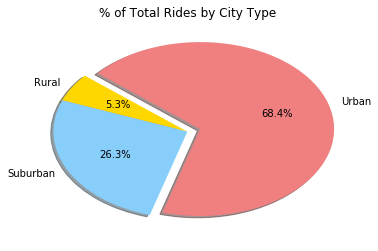

In [5]:
# Calculate Ride Percents
riders_city_type_sum =100*merge_table.groupby(["type"]).count()["ride_id"]/ merge_table["ride_id"].count()
# Build Pie Chart
plt.pie(riders_city_type_sum,labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0, 0, 0.1],
       autopct='%1.1f%%',
       shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("Fig3.png")
#show plot
plt.show



## Total Drivers by City Type

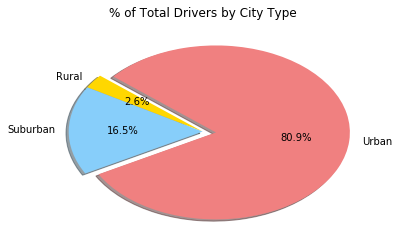

In [16]:
# Calculate Driver Percents
driver_city_type_sum = 100*city_pd.groupby(["type"]).sum()["driver_count"]/ city_pd["driver_count"].sum()
#print(driver_city_type_sum)
# Build Pie Charts
plt.pie(driver_city_type_sum,labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0, 0, 0.1],
       autopct='%1.1f%%',
       shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Fig4.png")
#show plot
plt.show()